In [8]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("darkgrid")
POLmonthyearQCL = pd.read_csv('queries_results/Poland/POL monthyear quadcl count.csv', header = 0,sep=' *, *', dtype={'EventRootCode':str})
POLmonthyearQCL["Time"]=pd.to_datetime(POLmonthyearQCL['MonthYear'], format='%Y%m').dt.strftime('%Y-%m')
quadcodes = pd.DataFrame({'QuadClass': [1, 2, 3, 4], 'QuadDescription': ['Verbal Cooperation', 'Material Cooperation', 'Verbal Conflict','Material Conflict']})
POLmonthyearQCL = POLmonthyearQCL.merge(quadcodes.set_index('QuadClass'), on='QuadClass', how='left')

/home/micha/GDELT/lib/python3.7/site-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,MonthYear,QuadClass,Count,Time,QuadDescription
0,201702,3,3470,2017-02,Verbal Conflict
1,201708,1,13254,2017-08,Verbal Cooperation
2,202005,1,125,2020-05,Verbal Cooperation
3,201903,4,2177,2019-03,Material Conflict
4,201812,4,2153,2018-12,Material Conflict
...,...,...,...,...,...
255,201907,2,1984,2019-07,Material Cooperation
256,201602,3,3221,2016-02,Verbal Conflict
257,201610,4,3698,2016-10,Material Conflict
258,201504,2,2679,2015-04,Material Cooperation


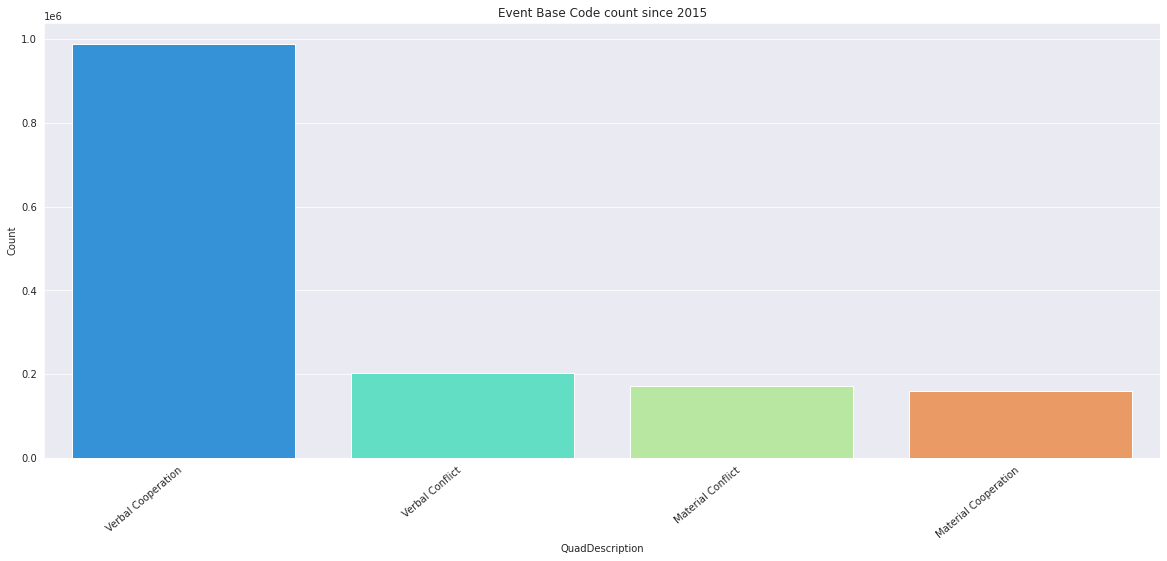

In [10]:
s = POLmonthyearQCL.groupby("QuadDescription", as_index=False).sum().sort_values(by="Count", ascending=False).head(30)
g = sns.barplot(s.QuadDescription, s.Count, palette='rainbow')
g.set_title("Event Base Code count since 2015")
g.set(ylabel='Count')
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
g.figure.set_size_inches(20,8)

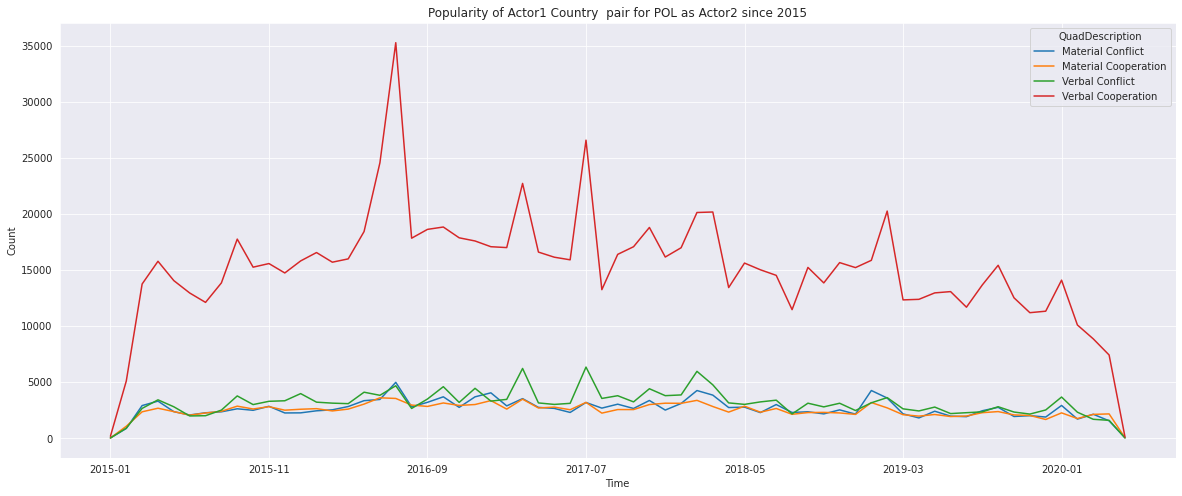

In [11]:
s = POLmonthyearQCL.groupby(["QuadDescription", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(10)
s = s.groupby(["Time","QuadDescription"]).agg({'Count':'sum'})
g = s.unstack().plot(y='Count')
g.set(ylabel='Count')
g.set_title("Popularity of Actor1 Country  pair for POL as Actor2 since 2015")
g.figure.set_size_inches(20,8)

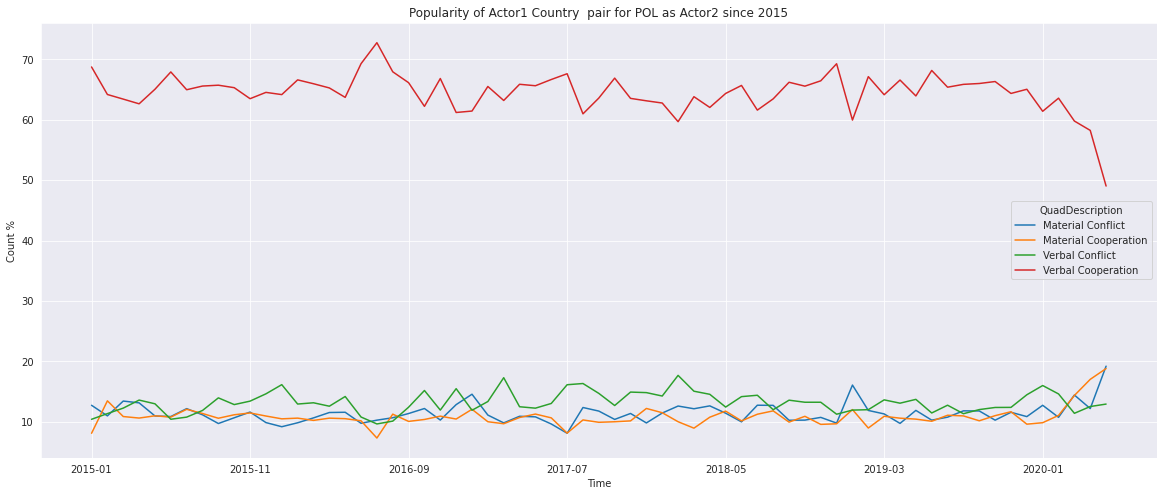

In [12]:
s = POLmonthyearQCL.groupby(["QuadDescription", "Time"], as_index=False).sum().sort_values(by="Count", ascending=False).groupby("MonthYear").head(10)
s = s.groupby(["Time","QuadDescription"]).agg({'Count':'sum'})

s['%']= s.groupby(level=0).apply(lambda x:  100*x / x.sum())

g = s.unstack().plot(y='%')
g.set(ylabel='Count %')
g.set_title("Popularity of Actor1 Country  pair for POL as Actor2 since 2015")
g.figure.set_size_inches(20,8)